In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


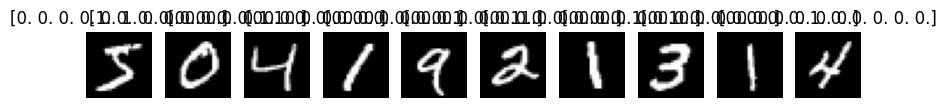

In [3]:
#see the images first 10
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()

In [4]:
def conv_model(input_shape=(28, 28, 1)):
  model = Sequential([
      layers.Conv2D(32, 3, (1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01), input_shape=input_shape),
      layers.Conv2D(32, 3, (1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, 3, (1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
      layers.Conv2D(64, 3, (1,1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
      layers.MaxPooling2D((2,2)),

      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  plot_model(model, to_file='conv_model.png', show_shapes=True, show_layer_names=True)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [5]:
#let's create the ResNet model
def resnet_block(x, filters, stride=1, weight_decay=0.0):
  shortcut = x
  x = layers.Conv2D(filters, 3, strides = stride, padding = 'same', use_bias = False, kernel_regularizer = regularizers.l2(weight_decay))(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Conv2D(filters, 3, strides = 1, padding = 'same', use_bias = False, kernel_regularizer = regularizers.l2(weight_decay))(x)
  x = layers.BatchNormalization()(x)
  if stride != 1 or shortcut.shape[-1] != filters:
    shortcut = layers.Conv2D(filters, 1, strides = stride, use_bias = False, kernel_regularizer = regularizers.l2(weight_decay))(shortcut)
    shortcut = layers.BatchNormalization()(shortcut)
    x = layers.Add()([x, shortcut])
  x = layers.Activation('relu')(x)
  return x

def resnet(input_shape=(28, 28, 1), num_classes=10, weight_decay=0.0):
  inputs = layers.Input(shape=input_shape)
  x = layers.Conv2D(32, 3, strides = 1, padding = 'same', use_bias = False, kernel_regularizer = regularizers.l2(weight_decay))(inputs)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  x = resnet_block(x, 32, 1, weight_decay)
  x = resnet_block(x, 32, 1, weight_decay)

  x = resnet_block(x, 64, 2, weight_decay)
  x = resnet_block(x, 64, 1, weight_decay)

  x = resnet_block(x, 128, 2, weight_decay)
  x = resnet_block(x, 128, 1, weight_decay)

  x = layers.GlobalAveragePooling2D()(x)
  outputs = layers.Dense(num_classes, activation='softmax')(x) # Added this line

  model = models.Model(inputs, outputs) # Changed x to outputs
  plot_model(model, to_file='resnet_model.png', show_shapes=True, show_layer_names=True)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [6]:
history_conv = conv_model().fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9088 - loss: 0.5624 - val_accuracy: 0.9777 - val_loss: 0.1286
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9771 - loss: 0.1330 - val_accuracy: 0.9824 - val_loss: 0.1177
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9820 - loss: 0.1065 - val_accuracy: 0.9845 - val_loss: 0.0924
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9841 - loss: 0.0924 - val_accuracy: 0.9868 - val_loss: 0.0813
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9866 - loss: 0.0821 - val_accuracy: 0.9842 - val_loss: 0.0843
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9888 - loss: 0.0728 - val_accuracy: 0.9854 - val_loss: 0.0833
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9893 - loss: 0.0678 - val_accuracy: 0.9872 - val_loss: 0.0727
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9899 - loss: 0.0638 

In [7]:
history_resnet = resnet().fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - accuracy: 0.9302 - loss: 0.2404 - val_accuracy: 0.9838 - val_loss: 0.0518
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9859 - loss: 0.0456 - val_accuracy: 0.9881 - val_loss: 0.0354
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9897 - loss: 0.0335 - val_accuracy: 0.9873 - val_loss: 0.0398
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9915 - loss: 0.0287 - val_accuracy: 0.9906 - val_loss: 0.0306
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9936 - val_loss: 0.0212
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9939 - loss: 0.0201 - val_accuracy: 0.9871 - val_loss: 0.0414
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9945 - loss: 0.0170 - val_accuracy: 0.9946 - val_loss: 0.0162
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9963 -

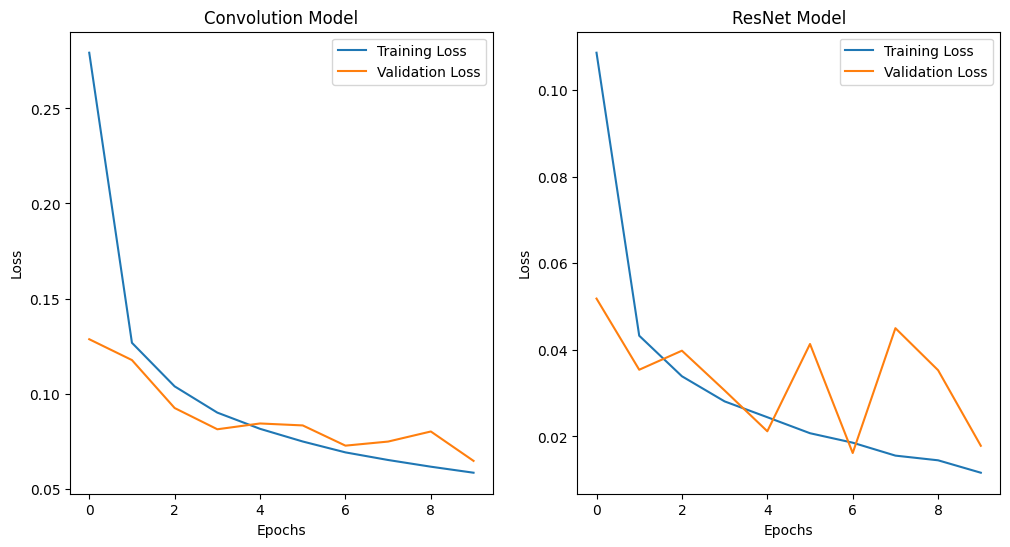

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.lineplot(history_conv.history['loss'], label='Training Loss')
sns.lineplot(history_conv.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.title("Convolution Model")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
sns.lineplot(history_resnet.history['loss'], label='Training Loss')
sns.lineplot(history_resnet.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ResNet Model")
plt.legend()
plt.show()

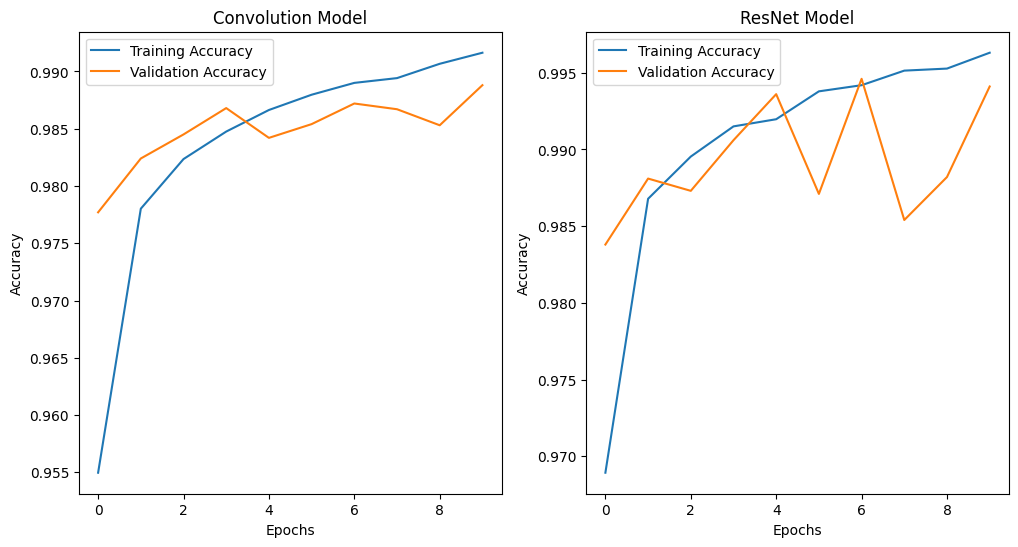

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.lineplot(history_conv.history['accuracy'], label='Training Accuracy')
sns.lineplot(history_conv.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.title("Convolution Model")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1,2,2)
sns.lineplot(history_resnet.history['accuracy'], label='Training Accuracy')
sns.lineplot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ResNet Model")
plt.legend()
plt.show()